In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Applying first Order 3*3 Filters to the image (Prewitt filters)**

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

#vertical filter
vertical_filter = [[-1,-1,-1], [0,0,0], [1,1,1]]

#horizontal filter
horizontal_filter = [[-1,0,1], [-1,0,1], [-1,0,1]]

img = plt.imread('/content/drive/MyDrive/Impulse_19/Task#3/Task3.jpg')
n,m = img.shape

vedges_img = img.copy()
hedges_img = img.copy()

for row in range(3, n-2):
    for col in range(3, m-2):

      local_pixels = img[row-1:row+2, col-1:col+2]                        #creating a local window for applying the filter iteratively
      vertical_transformed_pixels = vertical_filter*local_pixels          #applying vertical filter
      vertical_score = vertical_transformed_pixels.sum()/4

      vedges_img[row, col] = vertical_score

for row in range(3, n-2):
    for col in range(3, m-2):

      local_pixels = img[row-1:row+2, col-1:col+2]
      horizontal_transformed_pixels = horizontal_filter*local_pixels      #applying horizontal filter
      horz_score = horizontal_transformed_pixels.sum()/4

      hedges_img[row, col] = horz_score

We get reasonable outputs but with a degree of noise near the edges 

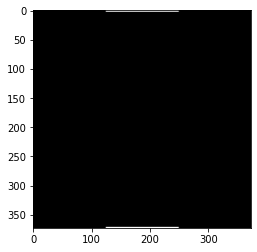

In [5]:
imgplot = plt.imshow(vedges_img, cmap = 'gray')
plt.show()

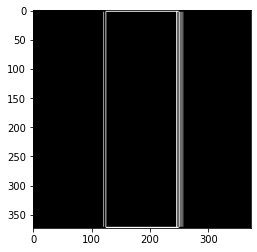

In [6]:
imgplot = plt.imshow(hedges_img, cmap = 'gray')
plt.show()

**Applying 5*5 Prewitt filters now to obtain second order derivative**

In [7]:
vedges_img2 = vedges_img.copy()
hedges_img2 = hedges_img.copy()

so_hfilter = [[1,0,-2,0,1], [1,0,-2,0,1], [1,0,-2,0,1], [1,0,-2,0,1], [1,0,-2,0,1]]    #initializing second order filters
so_vfilter = [[1,1,1,1,1], [0,0,0,0,0], [-2,-2,-2,-2,-2], [0,0,0,0,0], [1,1,1,1,1]]

for row in range(5, n-4):
    for col in range(5, m-4):

      local_pixels = vedges_img[row-2:row+3, col-2:col+3]                 #creating a local window for applying the filter iteratively
      vertical_transformed_pixels = so_vfilter*local_pixels          #applying vertical filter
      vertical_score = vertical_transformed_pixels.sum()

      vedges_img2[row, col] = vertical_score

for row in range(5, n-4):
    for col in range(5, m-4):

      local_pixels = hedges_img[row-2:row+3, col-2:col+3]
      horizontal_transformed_pixels = so_hfilter*local_pixels      #applying horizontal filter
      horz_score = horizontal_transformed_pixels.sum()

      hedges_img2[row, col] = horz_score

This gives slightly noisier outputs as it enhances all features indiscriminately

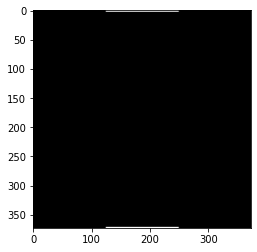

In [8]:
imgplot = plt.imshow(vedges_img2, cmap = 'gray')
plt.show()

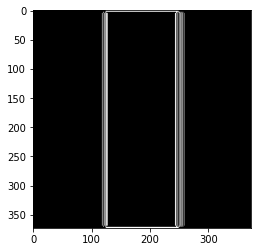

In [9]:
imgplot = plt.imshow(hedges_img2, cmap = 'gray')
plt.show()

**Applying second order spatial filter to the image (Laplacian filter), as this gives a cleaner output by eliminating the noise**

In [10]:
#laplacian spatial filter
laplacian = [[0,-1,0], [-1,4,-1], [0,-1,0]]

img = plt.imread('/content/drive/MyDrive/Impulse_19/Task#3/Task3.jpg')
n,m = img.shape

edges_img = img.copy()

for row in range(3, n-2):
    for col in range(3, m-2):

      local_pixels = img[row-1:row+2, col-1:col+2]                        #creating a local window for applying the filter iteratively
      transformed_pixels = laplacian*local_pixels                         #applying vertical filter
      score = transformed_pixels.sum()

      edges_img[row, col] = score

We get an output with much sharper edges but slightly higher general noise

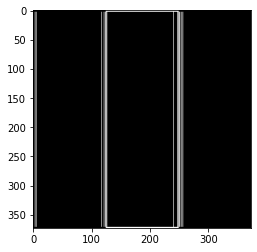

In [11]:
imgplot = plt.imshow(edges_img, cmap = 'gray')
plt.show()

In [13]:
import cv2

cv2.imwrite('/content/drive/MyDrive/Impulse_19/Task#3/hor1st.jpg', hedges_img) 
cv2.imwrite('/content/drive/MyDrive/Impulse_19/Task#3/vert1st.jpg', vedges_img)
cv2.imwrite('/content/drive/MyDrive/Impulse_19/Task#3/hor2nd.jpg', hedges_img2)
cv2.imwrite('/content/drive/MyDrive/Impulse_19/Task#3/vert2nd.jpg', vedges_img2)   

True